### Import the libraries

In [30]:
#import the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### read the data

In [31]:
#read  the data file
data = pd.read_csv("segments_1.csv")
print(data.head())
print('\n Data Types:')
print(data.dtypes)
print(data.shape)

     yr_wk                   user_id new_segment_tag
0  2019-23  5ceb1220506ced0019b70396             New
1  2019-23  5ced2f24aec0a60019518017             New
2  2019-23  5c15a174a545e800182ace22             New
3  2019-23  5cf650e7c537c60019cd4352             New
4  2019-23  5cf93b4ca29d41001aa7d45f             New

 Data Types:
yr_wk              object
user_id            object
new_segment_tag    object
dtype: object
(14466, 3)


In [32]:
data['firstdate']="";
data['lastdate']="";
data['date']="";

### convert the yr_wk column  to date format with year month day

In [33]:
#data.date = pd.to_datetime(data['yr_wk'])
import datetime
import time

i=0
def getDateRangeFromWeek(x):
    date = x.split('-')
    p_year=date[0]
    p_week=date[1]

    firstdayofweek = datetime.datetime.strptime(f'{p_year}-W{int(p_week )- 1}-1', "%Y-W%W-%w").date()
    lastdayofweek = firstdayofweek + datetime.timedelta(days=6.9)
    return firstdayofweek, lastdayofweek


for x in data.yr_wk:
    firstdate, lastdate = getDateRangeFromWeek(x)  
    data['firstdate'][i]=firstdate
    data['lastdate'][i]=lastdate
    data['date'][i]=firstdate
    i=i+1

data.head()


,yr_wk,user_id,new_segment_tag,firstdate,lastdate,date
0,2019-23,5ceb1220506ced0019b70396,New,2019-06-03,2019-06-09,2019-06-03
1,2019-23,5ced2f24aec0a60019518017,New,2019-06-03,2019-06-09,2019-06-03
2,2019-23,5c15a174a545e800182ace22,New,2019-06-03,2019-06-09,2019-06-03
3,2019-23,5cf650e7c537c60019cd4352,New,2019-06-03,2019-06-09,2019-06-03
4,2019-23,5cf93b4ca29d41001aa7d45f,New,2019-06-03,2019-06-09,2019-06-03


In [35]:
data.index

RangeIndex(start=0, stop=14466, step=1)

### set the date time field as index

In [36]:

#drop the yr_wk column
data.drop(['yr_wk'],axis=1,inplace=True)

In [37]:
data.head()

,user_id,new_segment_tag,firstdate,lastdate,date
0,5ceb1220506ced0019b70396,New,2019-06-03,2019-06-09,2019-06-03
1,5ced2f24aec0a60019518017,New,2019-06-03,2019-06-09,2019-06-03
2,5c15a174a545e800182ace22,New,2019-06-03,2019-06-09,2019-06-03
3,5cf650e7c537c60019cd4352,New,2019-06-03,2019-06-09,2019-06-03
4,5cf93b4ca29d41001aa7d45f,New,2019-06-03,2019-06-09,2019-06-03


In [38]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14466 entries, 0 to 14465
Data columns (total 5 columns):
user_id            14466 non-null object
new_segment_tag    14466 non-null object
firstdate          14466 non-null object
lastdate           14466 non-null object
date               14466 non-null object
dtypes: object(5)
memory usage: 565.2+ KB


### convert to datetime

In [39]:
data['firstdate']= pd.to_datetime(data.firstdate)
data['lastdate']= pd.to_datetime(data.lastdate)
data['date']= pd.to_datetime(data.date)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14466 entries, 0 to 14465
Data columns (total 5 columns):
user_id            14466 non-null object
new_segment_tag    14466 non-null object
firstdate          14466 non-null datetime64[ns]
lastdate           14466 non-null datetime64[ns]
date               14466 non-null datetime64[ns]
dtypes: datetime64[ns](3), object(2)
memory usage: 565.2+ KB


## Set the index 

In [40]:
data.index=data['date']

#strike the last column
data =data.iloc[:,:-1]

In [41]:
data.index

DatetimeIndex(['2019-06-03', '2019-06-03', '2019-06-03', '2019-06-03',
               '2019-06-03', '2019-06-03', '2019-06-03', '2019-06-03',
               '2019-06-03', '2019-06-03',
               ...
               '2019-07-08', '2019-07-08', '2019-07-08', '2019-07-08',
               '2019-07-08', '2019-07-08', '2019-07-08', '2019-07-08',
               '2019-07-08', '2019-07-08'],
              dtype='datetime64[ns]', name='date', length=14466, freq=None)

In [42]:
#convert to time series
ts = data['user_id']
ts.head()

date
2019-06-03    5ceb1220506ced0019b70396
2019-06-03    5ced2f24aec0a60019518017
2019-06-03    5c15a174a545e800182ace22
2019-06-03    5cf650e7c537c60019cd4352
2019-06-03    5cf93b4ca29d41001aa7d45f
Name: user_id, dtype: object

In [43]:
ts['2019-06-03']

date
2019-06-03    5ceb1220506ced0019b70396
2019-06-03    5ced2f24aec0a60019518017
2019-06-03    5c15a174a545e800182ace22
2019-06-03    5cf650e7c537c60019cd4352
2019-06-03    5cf93b4ca29d41001aa7d45f
                        ...           
2019-06-03    5cf172bbcb45750018869537
2019-06-03    5cfc6e590852dc0018ad6a6b
2019-06-03    5cf5b0616e0752001aa85414
2019-06-03    5cf9b204a29d41001aa7f83e
2019-06-03    5ce5a09662277b0019f8bc21
Name: user_id, Length: 1788, dtype: object

In [44]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
data['userid'] =le.fit_transform(data.user_id)
data.head()

,user_id,new_segment_tag,firstdate,lastdate,userid
date,,,,,
2019-06-03,5ceb1220506ced0019b70396,New,2019-06-03,2019-06-09,5675
2019-06-03,5ced2f24aec0a60019518017,New,2019-06-03,2019-06-09,5744
2019-06-03,5c15a174a545e800182ace22,New,2019-06-03,2019-06-09,3122
2019-06-03,5cf650e7c537c60019cd4352,New,2019-06-03,2019-06-09,6238
2019-06-03,5cf93b4ca29d41001aa7d45f,New,2019-06-03,2019-06-09,6573


In [ ]:
#convert to time series
ts1 = data['userid']
ts1.head()

## plot the time series

In [ ]:

plt.figure(figsize=(20,20))
plt.plot(ts)

## function for testing stationarity

In [34]:

import pandas as pd
from statsmodels.tsa.stattools import adfuller


def test_stationarity(timeseries):
    #Determing rolling statistics
   # rolmean = pd.rolling_mean(timeseries, window=12)#mean
    rolmean = timeseries.rolling(12).mean()
    #std deviation or variance can be taken
    rolstd = timeseries.rolling(window=12).std()

    #Plot rolling statistics:
    orig = plt.plot(timeseries, color='blue',label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)
    
    #Perform Dickey-Fuller test:
    print('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    print(dftest)
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    print(dfoutput)
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value   
        print(dfoutput)


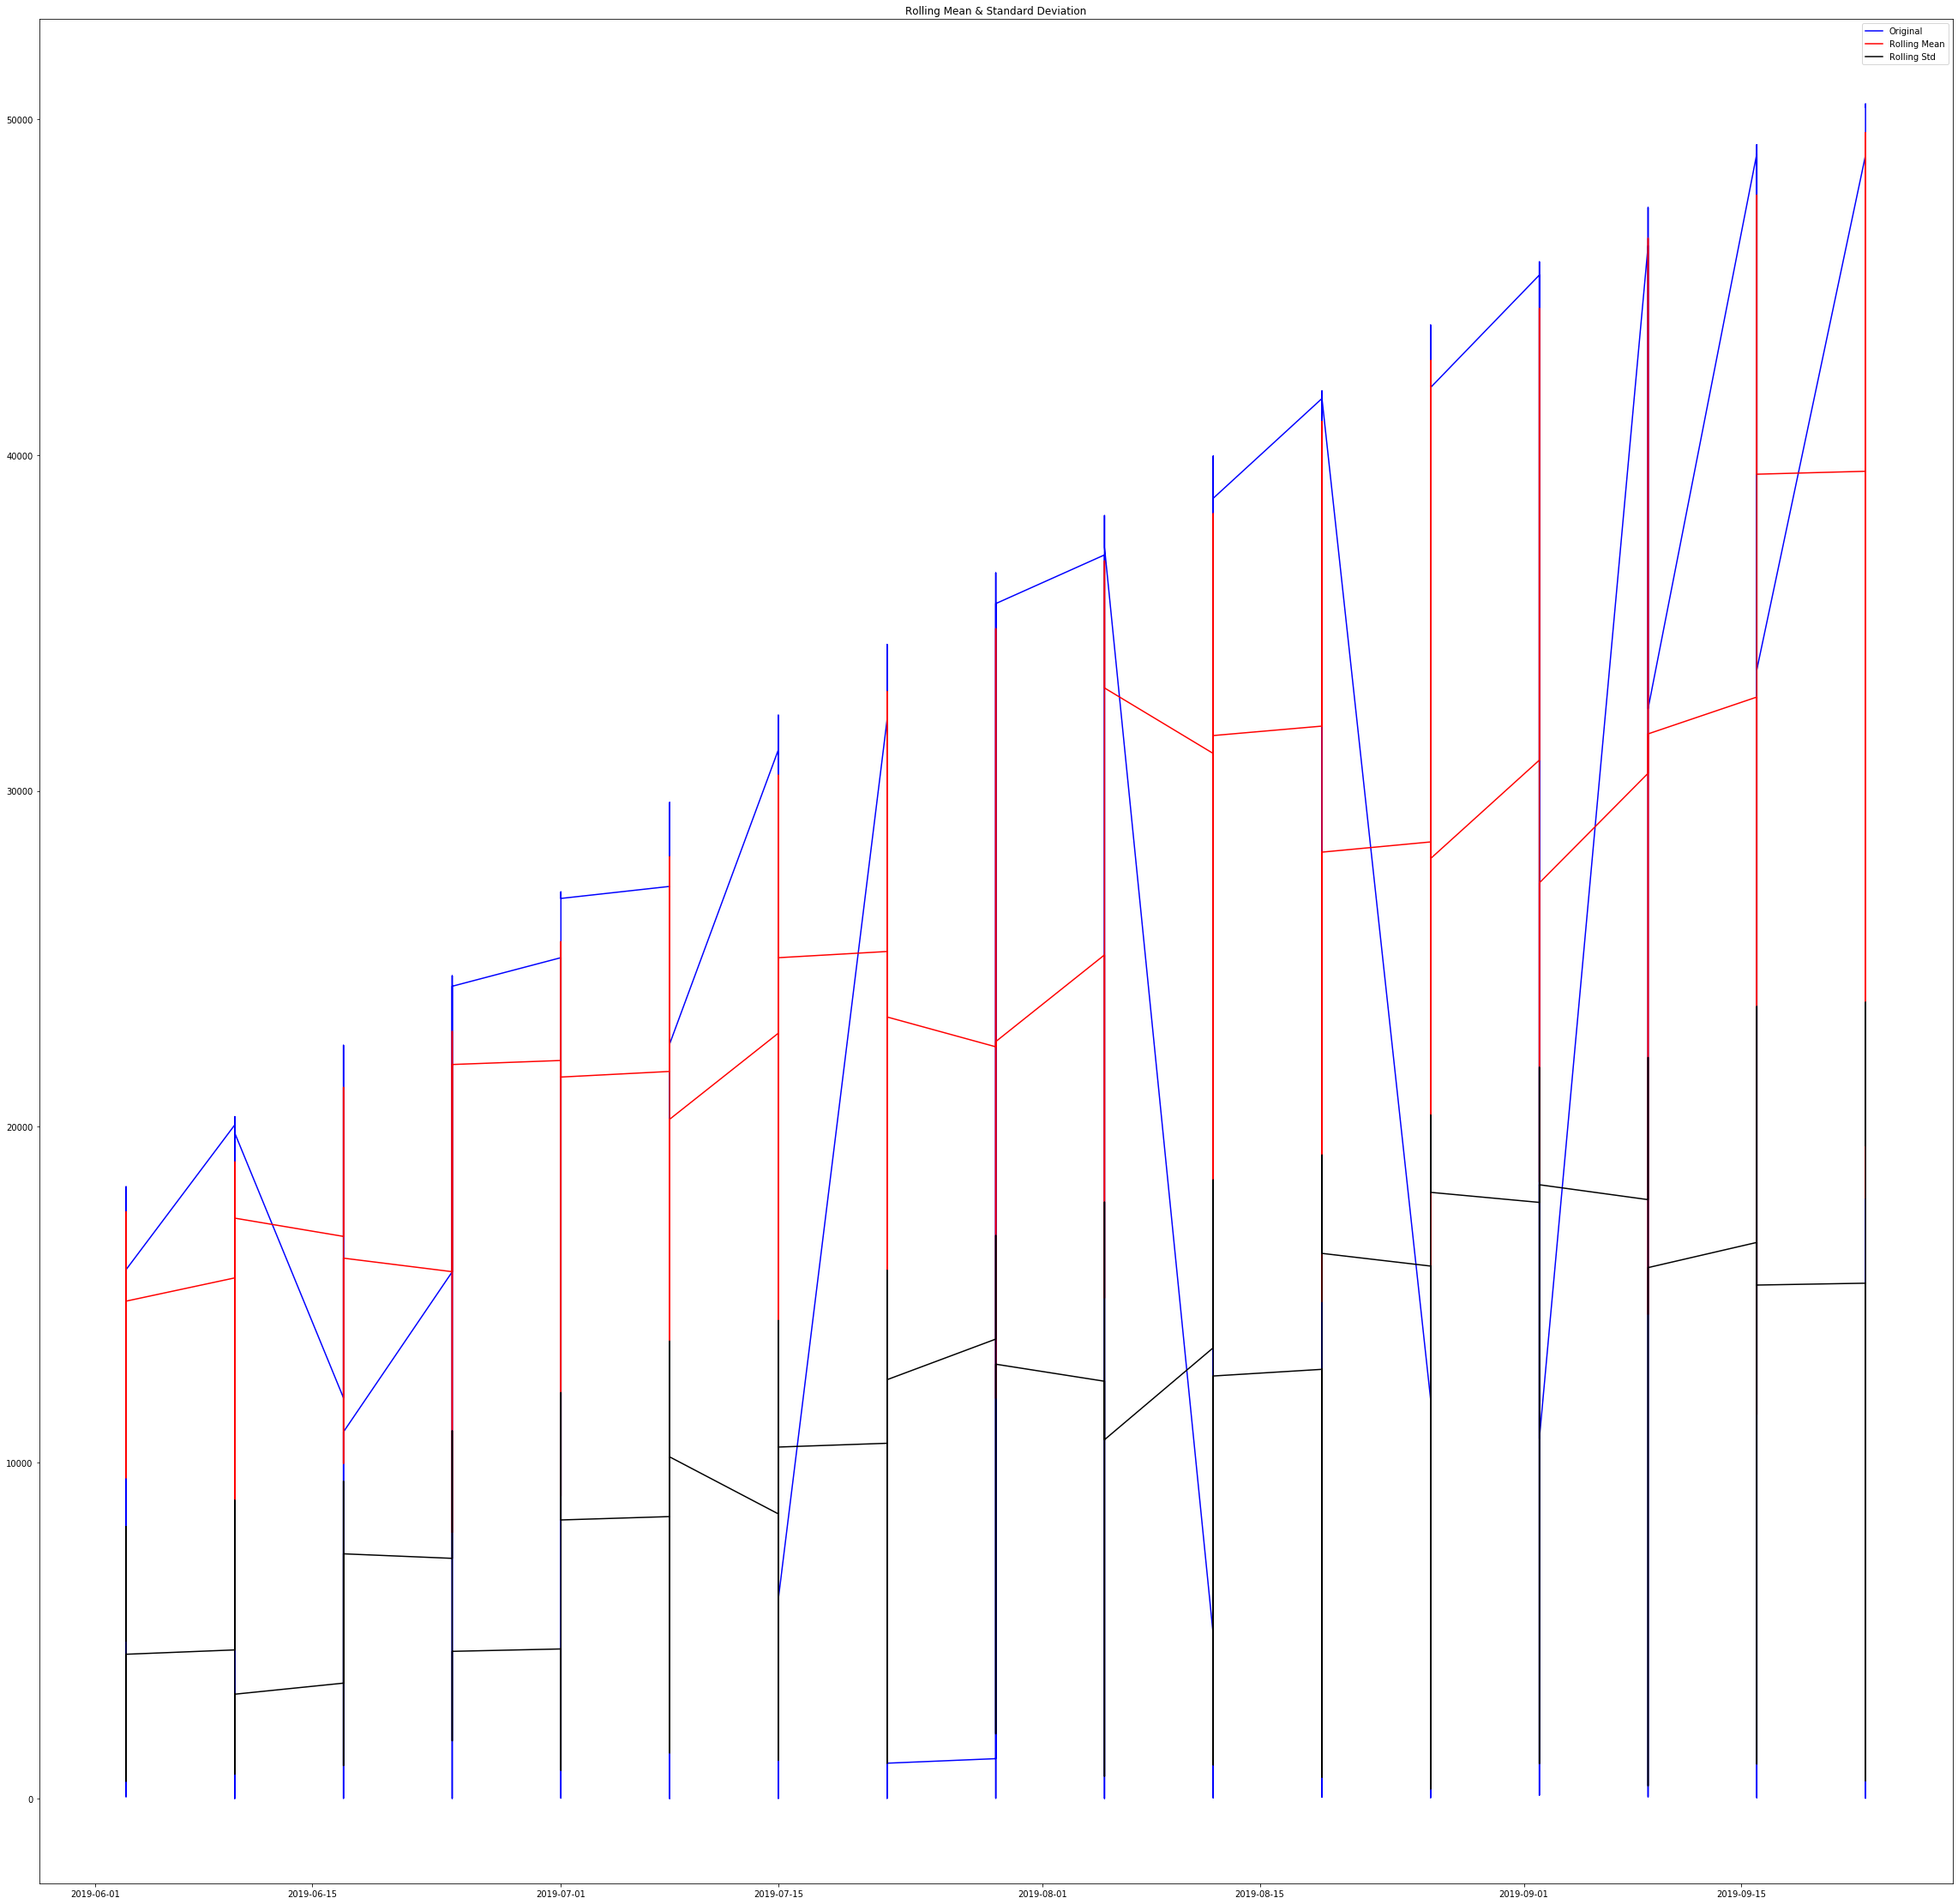

Results of Dickey-Fuller Test:
(-6.717723205387555, 3.5469432996165827e-09, 57, 50399, {'1%': -3.430479757199417, '5%': -2.8615973500272895, '10%': -2.566800525521047}, 1096624.9361257695)
Test Statistic                -6.717723e+00
p-value                        3.546943e-09
#Lags Used                     5.700000e+01
Number of Observations Used    5.039900e+04
dtype: float64
Test Statistic                -6.717723e+00
p-value                        3.546943e-09
#Lags Used                     5.700000e+01
Number of Observations Used    5.039900e+04
Critical Value (1%)           -3.430480e+00
dtype: float64
Test Statistic                -6.717723e+00
p-value                        3.546943e-09
#Lags Used                     5.700000e+01
Number of Observations Used    5.039900e+04
Critical Value (1%)           -3.430480e+00
Critical Value (5%)           -2.861597e+00
dtype: float64
Test Statistic                -6.717723e+00
p-value                        3.546943e-09
#Lags Used        

In [36]:
#plot the time series
plt.figure(figsize=(40,40))

test_stationarity(ts)

In [ ]:
def test_stationarity(timeseries):

    #Determing rolling statistics
    rolmean = timeseries.rolling(window=24).mean() # 24 hours on each day
    rolstd = timeseries.rolling(window=24).std()

C:\Users\GIM\Anaconda3\lib\site-packages\pandas\core\series.py:853: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


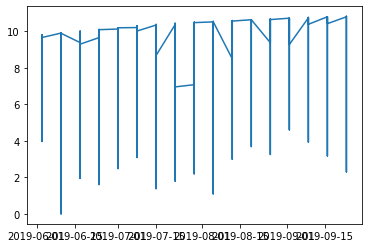

In [37]:
ts_log=np.log(ts)
plt.plot(ts_log)